In [1]:
#Importar librerias
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
import warnings 
warnings.filterwarnings('ignore')

In [4]:
#Cambiar Directorio de trabajo
os.chdir('C:\\Users\\wichi\\OneDrive\\Documentos\\EBAC\\Data Science\\Actividades\\Máquinas de Soporte Vertical (SVM)')

In [5]:
#Cargando la base de datos
df_hum = pd.read_csv("recursos_humanos.csv")
df_hum

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### Transformando variables de tipo caracter a numericas 

In [13]:
#Utilizando get dummies para transformar variables categoricas en numericas
df_hum2 = pd.get_dummies(df_hum, prefix=['sales', 'salary'])
df_hum2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [14]:
#Analizando los tipos de datos
df_hum2.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales_IT                   uint8
sales_RandD                uint8
sales_accounting           uint8
sales_hr                   uint8
sales_management           uint8
sales_marketing            uint8
sales_product_mng          uint8
sales_sales                uint8
sales_support              uint8
sales_technical            uint8
salary_high                uint8
salary_low                 uint8
salary_medium              uint8
dtype: object

In [17]:
#Ver cuantos nulos existen por columna
df_hum2.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales_IT                 0
sales_RandD              0
sales_accounting         0
sales_hr                 0
sales_management         0
sales_marketing          0
sales_product_mng        0
sales_sales              0
sales_support            0
sales_technical          0
salary_high              0
salary_low               0
salary_medium            0
dtype: int64

# Graficando las variables 	satisfaction_level	y last_evaluation

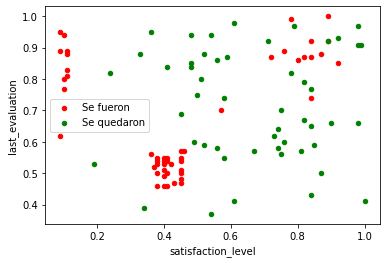

In [18]:
ax = df_hum2[df_hum2["left"]==1][0:50].plot(kind='scatter', x = 'satisfaction_level', y = 'last_evaluation', color ='Red', label = 'Se fueron')
ax = df_hum2[df_hum2["left"]==0][0:50].plot(kind='scatter', x = 'satisfaction_level', y = 'last_evaluation', color ='Green', label = 'Se quedaron', ax = ax)
plt.show()

## Separando datos de entrenamiento y de prueba

In [19]:
#Base de variables independientes
x = df_hum2.drop(['left'], axis = 1)
x.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [20]:
#Base variables dependientes
y = df_hum['left']
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [22]:
#Separar las bases de entrenamiento y de prueba del modelo
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [23]:
X_train.shape

(11999, 20)

In [24]:
X_test.shape

(3000, 20)

# Construyendo el Modelo

In [25]:
from sklearn import svm

### Kernel Linear

In [ ]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, Y_train)

In [27]:
yhat = clf.predict(X_test)
yhat

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

#### Matriz de confusión

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, yhat)
cm

array([[2149,  138],
       [ 522,  191]], dtype=int64)

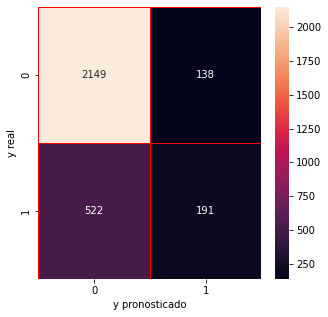

In [31]:
# Visualizar matriz confusión
import seaborn as sns
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor="Red", fmt = '.0f', ax = ax)
plt.xlabel("y pronosticado")
plt.ylabel("y real")
plt.show()

### Estadisticas de desempeño

In [36]:
from sklearn.metrics import classification_report
cnf_matrix = confusion_matrix(Y_test, yhat, labels=[0,1])
print(classification_report(Y_test, yhat))


              precision    recall  f1-score   support

           0       0.80      0.94      0.87      2287
           1       0.58      0.27      0.37       713

    accuracy                           0.78      3000
   macro avg       0.69      0.60      0.62      3000
weighted avg       0.75      0.78      0.75      3000



### Conclusiones:
El modelo con el kernel linear, tuvo una precisión del 80% para predecir los casos donde los empleados no se irian de la empresa, mientra que, en el caso donde los empleados si se van tuvo un 58% de precisión. 
El recall de este modelo es capaz de predecir el 94% de los casos en que un empleado se quedara, es decir que de 4 empleados, el modelo es capaz de predecir que 3  de estos se quedaran en la empresa, el cuarto es donde es impreciso.
Para f1, es una combinacion entre precision y recall, el cual hace que estas dos variables tomen el mismo peso y se les da un puntaje entre mas alto sea este puntaje el modelo hace mejores predicciones.
En resumen:
- Precision nos da la calidad de la predicción: ¿qué porcentaje de los que hemos dicho que son la clase positiva, en realidad lo son?
- Recall nos da la cantidad: ¿qué porcentaje de la clase positiva hemos sido capaces de identificar?
- F1 combina Precision y Recall en una sola medida
- La Matriz de Confusión indica qué tipos de errores se cometen

## Kernel RBF

In [38]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, Y_train)

SVC()

In [39]:
#Prediccion con el modelo
yhat = clf.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Estadisticas de desempeño

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, yhat)
cm

array([[2287,    0],
       [ 669,   44]], dtype=int64)

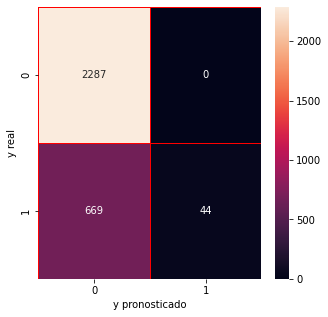

In [41]:
# Visualizar matriz confusión
import seaborn as sns
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor="Red", fmt = '.0f', ax = ax)
plt.xlabel("y pronosticado")
plt.ylabel("y real")
plt.show()

In [42]:
from sklearn.metrics import classification_report
cnf_matrix = confusion_matrix(Y_test, yhat, labels=[0,1])
print(classification_report(Y_test, yhat))


              precision    recall  f1-score   support

           0       0.77      1.00      0.87      2287
           1       1.00      0.06      0.12       713

    accuracy                           0.78      3000
   macro avg       0.89      0.53      0.49      3000
weighted avg       0.83      0.78      0.69      3000



## Conclusiones
El modelo con el kernel linear, tuvo una precisión del 77% para predecir los casos donde los empleados no se irian de la empresa, mientra que, en el caso donde los empleados si se van tuvo un 100% de precisión. 
El recall de este modelo es capaz de predecir el 100% de los casos en que un empleado se quedara, es decir que de 4 empleados, el modelo es capaz de predecir que 4  de estos se quedaran en la empresa.
Para f1, es una combinacion entre precision y recall, el cual hace que estas dos variables tomen el mismo peso y se les da un puntaje entre mas alto sea este puntaje el modelo hace mejores predicciones.


## Kernel polinomial

In [43]:
clf = svm.SVC(kernel='poly')
clf.fit(X_train, Y_train)

SVC(kernel='poly')

In [44]:
#Prediccion con el modelo
yhat = clf.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, yhat)
cm

array([[2287,    0],
       [ 713,    0]], dtype=int64)

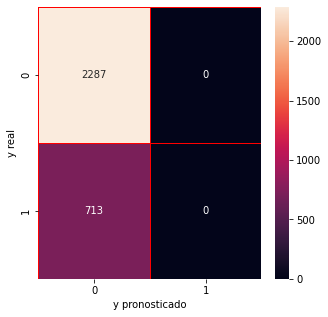

In [46]:
# Visualizar matriz confusión
import seaborn as sns
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor="Red", fmt = '.0f', ax = ax)
plt.xlabel("y pronosticado")
plt.ylabel("y real")
plt.show()

### Estadisticas de desempeño

In [47]:
from sklearn.metrics import classification_report
cnf_matrix = confusion_matrix(Y_test, yhat, labels=[0,1])
print(classification_report(Y_test, yhat))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87      2287
           1       0.00      0.00      0.00       713

    accuracy                           0.76      3000
   macro avg       0.38      0.50      0.43      3000
weighted avg       0.58      0.76      0.66      3000



### Conclusiones

El modelo con el kernel linear, tuvo una precisión del 76% para predecir los casos donde los empleados no se irian de la empresa, mientra que, en el caso donde los empleados si se van tuvo un 0% de precisión. 
El recall de este modelo es capaz de predecir el 100% de los casos en que un empleado se quedara, es decir que de 4 empleados, el modelo es capaz de predecir que 4  de estos se quedaran en la empresa, el cuarto es donde es impreciso.
Para f1, es una combinacion entre precision y recall, el cual hace que estas dos variables tomen el mismo peso y se les da un puntaje entre mas alto sea este puntaje el modelo hace mejores predicciones.


## Kernel sigmoid

In [48]:
clf = svm.SVC(kernel='sigmoid')
clf.fit(X_train, Y_train)

SVC(kernel='sigmoid')

In [49]:
#Prediccion con el modelo
yhat = clf.predict(X_test)
yhat

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, yhat)
cm

array([[1885,  402],
       [ 507,  206]], dtype=int64)

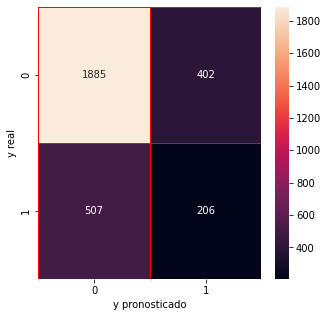

In [51]:
# Visualizar matriz confusión
import seaborn as sns
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor="Red", fmt = '.0f', ax = ax)
plt.xlabel("y pronosticado")
plt.ylabel("y real")
plt.show()

In [52]:
from sklearn.metrics import classification_report
cnf_matrix = confusion_matrix(Y_test, yhat, labels=[0,1])
print(classification_report(Y_test, yhat))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81      2287
           1       0.34      0.29      0.31       713

    accuracy                           0.70      3000
   macro avg       0.56      0.56      0.56      3000
weighted avg       0.68      0.70      0.69      3000



### Conclusiones
El modelo con el kernel linear, tuvo una precisión del 79% para predecir los casos donde los empleados no se irian de la empresa, mientra que, en el caso donde los empleados si se van tuvo un 34% de precisión. 
El recall de este modelo es capaz de predecir el 82% de los casos en que un empleado se quedara, es decir que de 4 empleados, el modelo es capaz de predecir que 3  de estos se quedaran en la empresa, el cuarto es donde es impreciso.
Para f1, es una combinacion entre precision y recall, el cual hace que estas dos variables tomen el mismo peso y se les da un puntaje entre mas alto sea este puntaje el modelo hace mejores predicciones.


### Ejercicio final

El mejor desempñeo de este modelo es con el kernel RBF, es por esto que para realizar la prediccion de los futuros datos de los empleados sera procesados por este modelo.

In [160]:
nuevo_empleado = pd.DataFrame({"satisfaction_level":[0.5], "last_evaluation":[0.75], "number_project":[4], "average_montly_hours":[200], "time_spend_company":[4], "Work_accident":[0], "left":[0],"promotion_last_5years":[0], "sales":["sales"], "salary":["medium"]})
nuevo_empleado

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.5,0.75,4,200,4,0,0,0,sales,medium


In [161]:
df_hum3 = pd.concat([df_hum, nuevo_empleado], ignore_index=True)
df_hum3 = pd.get_dummies(df_hum3, prefix=['sales', 'salary'])
df_hum3 = df_hum3.drop(['left'], axis = 1)

In [156]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, Y_train)

SVC()

In [163]:
# Como podemos ver para estos nuevos datos, nuestro modelo predijo que el empleado se quedara en la empres
clf.predict(df_hum3.tail(1))

array([0], dtype=int64)